# 二、监督学习

如果一个模型能对没见过的数据做出准确预测，我们就说它能够从训练集泛化到测试集。我们想要构建一个泛化精度尽可能高的模型

判断一个算法在新数据上表现好坏的唯一度量，就是在测试集上的评估

In [12]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

## 2.1 一些样本数据集

### 2.1.1 forge数据集
一个小型的模拟数据集，用于分类

D:\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


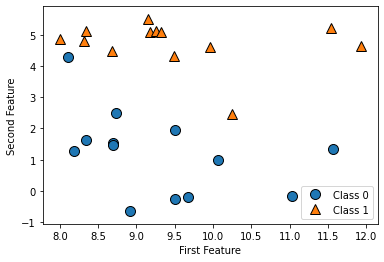

In [7]:
# 生成数据集
X, y = mglearn.datasets.make_forge()
# 数据集绘图
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

### 2.1.2 cancer数据集
威斯康星州乳腺癌数据集

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
cancer.data.shape

(569, 30)

In [13]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [14]:
cancer.feature_names # 30个特征的名字

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 2.2 K近邻分类算法

### 2.2.1 K近邻在forge数据集上的应用

D:\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


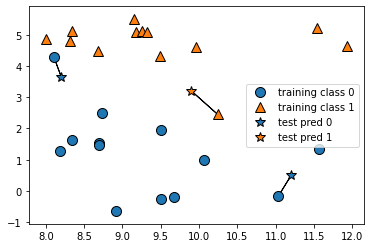

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
#

D:\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


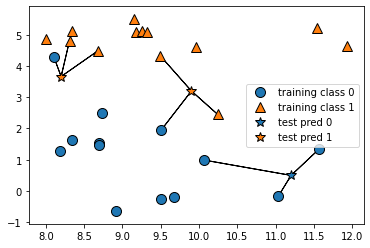

In [17]:
# k=3
mglearn.plots.plot_knn_classification(n_neighbors=3)

通过scikit-learn来应用k近邻算法

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X, y = mglearn.datasets.make_forge()
# 将数据分为训练集和测试集，以评估其泛化性能
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=0)
print("X_train.shape: {} ------>  y_train.shape: {}\n".format(X_train.shape, y_train.shape))
print("X_test.shape: {} ------> y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (19, 2) ------>  y_train.shape: (19,)

X_test.shape: (7, 2) ------> y_test.shape: (7,)


In [24]:
# 导入类并实例化
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
# 利用训练集对这个分类器进行 拟合
# 对于KNeighborsClassifier来说就是保存数据集，以便在预测时计算与邻居间的距离
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
# 调用predict方法对测试数据进行预测
# 对于测试集中每个数据点，都要计算它在训练集中的最近邻，然后找出其中出现次数最多的类别作为预测结果
print("Test set predictions: {}".format(knn.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [28]:
# 使用精度评估泛化能力的好坏
acc = knn.score(X_test, y_test)
acc

0.8571428571428571

### 2.2.2 分析KNeighborsClassifier

对于二维数据，可以在**xy平面**上画出所有可能的测试点的预测结果，根据平面中每个点所属的类别对平面进行着色。这样可以查看**决策边界**，即算法对Class 0和Class 1的分界线

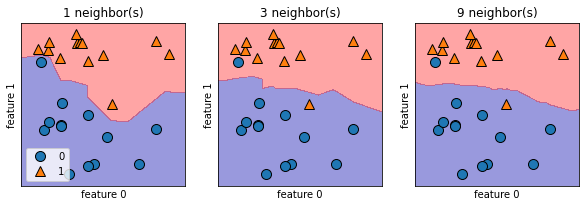

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)                     

从左图可以看出，使用单一邻居绘制的决策边界紧跟着训练数据。随着邻居个数的增多，决策边界也越来越平滑。更平滑的边界对应着更简单的模型。换句话说，使用更少的邻居对应着更高的模型复杂度，而使用更多的邻居对应着更低的模型复杂度

### 2.2.3 KNN在cancer数据集上的应用

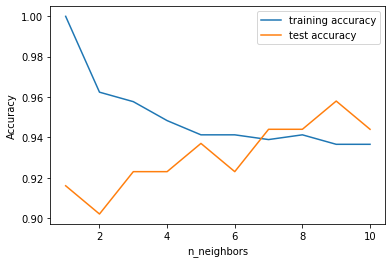

In [35]:
# 先将数据分成训练集和测试集
# 使用不同的邻居个数对训练集和测试集的性能进行评估
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

training_accuracy=[]
test_accuracy=[]
# n_neighbors ：1-10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    # 构建模型
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    # 记录训练集精度
    training_accuracy.append(knn.score(X_train, y_train))
    # 记录泛化精度
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

KNN的优点：
- 很好的基准算法
- 模型已于理解，且不用过多调节就能得到不错的性能

KNN的缺点：
- 处理速度慢
- 不能处理具有很多特征的数据集

## 2.3 用于分类的线性模型

$y = w_0*x_0+w_1*x_1+\cdots+w_p*x_p > 0$
对于用于分类的线性模型，不返回特征的加权求和，而是为预测设置了阈值，如果函数值大于阈值，就是Class One，如果函数值小于阈值，就是Class Two

对于用于分类的线性模型，**决策边界**是输入的线性函数

### 2.3.1 
最常见的两种线性分类算法是**Logistic回归** 和 **线性支持向量机SVM**，示例如下：

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

D:\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda3\envs\paper\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


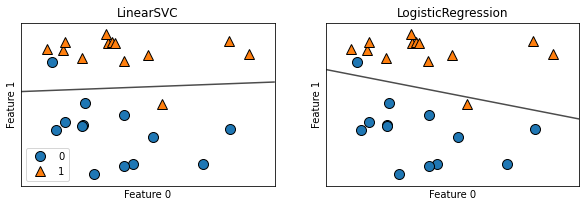

In [14]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

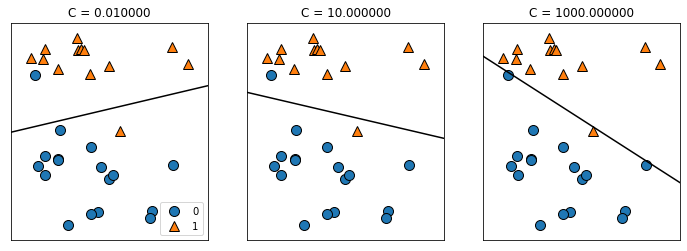

In [15]:
mglearn.plots.plot_linear_svc_regularization()

### 2.3.2 更大的数据集

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=42)
# C=1
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test, y_test)))

Training set score:0.948
Test set score:0.958


D:\Anaconda3\envs\paper\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


$C=1$的默认值给出了相当好的性能,在训练集和测试集上都取得了近似$95\%$的精度。
但是由于训练`集和测试集的性能非常接近，所以模型很可能是**欠拟合**的，可以尝试增大C来拟合一个更灵活的模型

In [17]:
# 模型更复杂
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test, y_test)))

Training set score:0.953
Test set score:0.965


D:\Anaconda3\envs\paper\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
# 模型更简单，即正则化程度更强
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test, y_test)))

Training set score:0.934
Test set score:0.930


D:\Anaconda3\envs\paper\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


查看正则化参数C取3个不同的值时，模型学习到的系数

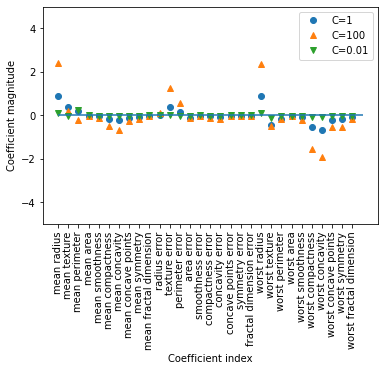

In [24]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

### 2.3.3 用于多分类的线性模型

将二分类算法推广到多分类算法的一种常见方法是“one vs rest”一对余。<br>
在“一对其余”的方法中，对每个类别都学习一个二分类模型，将这个类别与其它所有类别区分开，这样就生成了与类别个数一样多的二分类模型。

将“一对余”应用到一个简单的三分类数据集上：

In [9]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
X, y=make_blobs(random_state=42) # X.shape=(100,2),总共3种类别

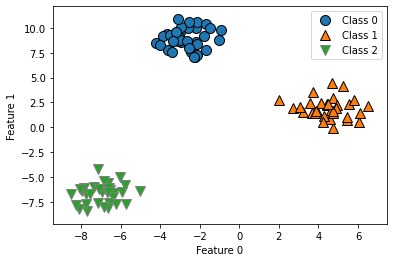

In [11]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

在这个数据集上训练一个LinearSVM分类器：

In [12]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) # coef每行包含3个类别之一的系数向量，每列包含某个特征
print("Intercept shape: ", linear_svm.intercept_.shape) # intercept是一维数组，保存每个类别的截距

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


可视化3个分类器的决策边界：

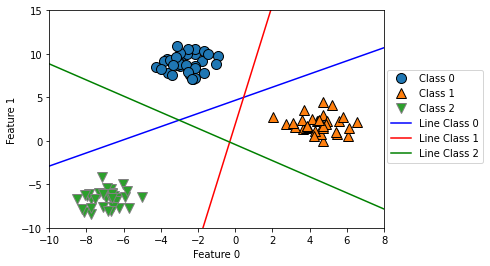

In [14]:
import numpy as np
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0]+intercept)/coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0','Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01,0.3))
    
    

线性模型的主要参数是**正则化参数**，在回归模型中叫*alpha*， 在**分类模型**中叫$C$。<br>
> alpha或者C的值较小，说明模型比较简单

### 2.3.4 朴素贝叶斯分类器

1. 朴素贝叶斯模型的泛化能力要比线性分类器（如LogisticRegression或者LinearSVC）差
2. 朴素贝叶斯模型高效的原因是因为它通过单独查看每个特征来学习参数，并从每个特征中收集简单的类别统计数据
3. scikit-learn中的三种朴素贝叶斯分类器：GaussianNB/BernoulliNB/MultinomialNB
4. GaussianNB适用于任意连续数据；BernoulliNB适用于二分类数据；MulinomialNB试用于输入数据为计数数据（即每个特征代表某个对象的整数计数，比如一个单词在句子里的出现次数）
5. BernoulliNB和MultinomialNB主要用于**文本数据分类**

demo01:

In [17]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]]) # 4个样本，每个样本4个二分类特征
y = np.array([0,1,0,1]) # 2个类别：0和1

In [20]:
counts = {}
for label in np.unique(y):
    # 对每个类别进行遍历
    # 计算（求和）每个特征中1的个数
    counts[label] = X[y==label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 2.3.5 决策树

ExecutableNotFound: failed to execute ['dot.bat', '-Kdot', '-Tpng', '-O', 'tmp'], make sure the Graphviz executables are on your systems' PATH

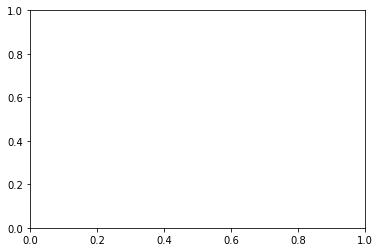

In [23]:
mglearn.plots.plot_animal_tree()

对数据反复进行递归划分，直到划分后的每个区域（决策树的每个叶节点）只包含单一目标值（单一类别或单一回归值), 会导致**过拟合**。<br>
防止过拟合：<br>
- 预剪枝(pre-pruning)：及早停止树的生长
- 后剪枝(post-pruning):先构造树，但随后删除或折叠信息量很少的结点

基于scikit-learn的预剪枝：

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
# 默认决策树完全展开（过拟合），决策树深度很大，模型非常复杂，泛化能力差
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


预剪枝：<br>
设置max_depth=4,意味着只可以连续问4个问题。<br>
> 限制树的深度可以减少过拟合，这会降低训练集的深度，但可以提高测试集的精度

In [28]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.951


树的特征重要性：

In [30]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.73943775, 0.        , 0.        ,
       0.013032  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01737208, 0.00684355, 0.        ,
       0.06019401, 0.11783988, 0.        , 0.03522339, 0.01005736,
       0.        , 0.        , 0.        , 0.        , 0.        ])

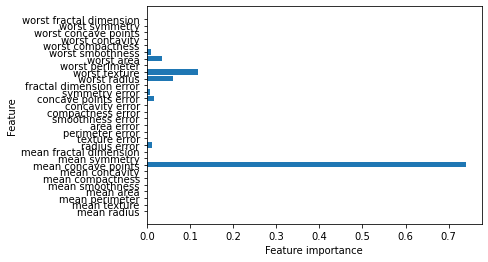

In [31]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot.bat', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

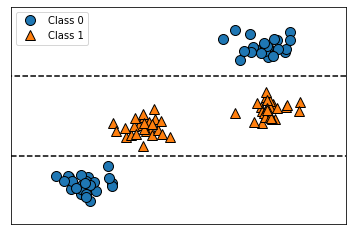

In [32]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### 2.3.6 决策树集成

**集成（ensemble）** 是合并多个机器学习模型来构建更强大模型的方法

** 随机森林： **
思想：
> 每棵树的预测可能都很好，但可能对部分数据过拟合。<br>如果构造很多树，并且每棵树的预测都很好，但都以不同的方式过拟合，则可以对这些树的结果取平均值来降低过拟合。

> 随机森林的名字来自于将随机性添加到树的构造过程中，以确保每棵树都各不相同。<br>随机森林的随机化方法有两种：
- 通过构造树的数据点
- 通过选择每次划分测试的特征

1. 构造随机森林
- 确定要构造的树的个数
- 构造一棵树，需要对原数据集进行**有放回的自助采样bootstrap sample**，基于这个采样出来的心数据集来构造一棵决策树，则决策树之间会存在差异
- 对每个特征寻找最佳测试
如果max_features较大，则随机森林的树将会非常相似，利用最独特的特征可以轻松拟合数据。
如果max_featuers较小，则sui'ji